<a href="https://colab.research.google.com/github/parthgiri01/WEEK-4-TEST/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 10 logistic regression

# Dr Mohamed Ihmeida

# CMP7239 Applied Machine Learning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Before you start the lab make sure you attached the cybersecurity Intrusion Detection dataset to this notebook.



*   Make sure your write the metrics such as AUC‑ROC, F1-score, Accuracy, Recall and Precision before and after the feature selection.
*   Can you run the same code for Decision Tree and KNN and compare the result.



--- LogisticRegression ---
Accuracy : 0.7280
Precision: 0.7174
Recall   : 0.6460
F1 Score : 0.6798
AUC-ROC  : 0.7876

--- DecisionTree ---
Accuracy : 0.8265
Precision: 0.8129
Recall   : 0.7948
F1 Score : 0.8038
AUC-ROC  : 0.8235

--- KNN ---
Accuracy : 0.7945
Precision: 0.8552
Recall   : 0.6506
F1 Score : 0.7390
AUC-ROC  : 0.8280

--- LogReg+Chi2(k=4) ---
Accuracy : 0.7301
Precision: 0.7212
Recall   : 0.6460
F1 Score : 0.6815
AUC-ROC  : 0.7887

--- DT+Chi2(k=4) ---
Accuracy : 0.8139
Precision: 0.7895
Recall   : 0.7960
F1 Score : 0.7928
AUC-ROC  : 0.8122

--- KNN+Chi2(k=4) ---
Accuracy : 0.8664
Precision: 0.9463
Recall   : 0.7433
F1 Score : 0.8326
AUC-ROC  : 0.8702



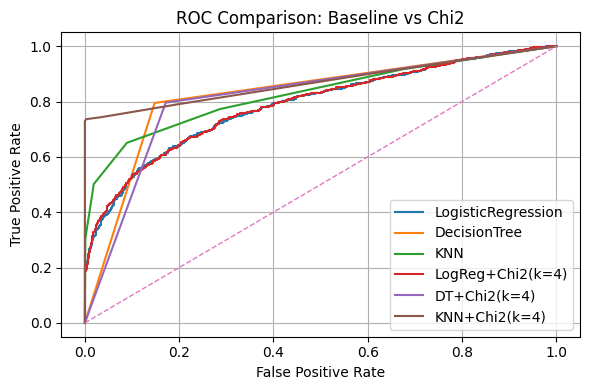

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/Cybersecurity Intrusion Detection.csv')
X = df.drop(['session_id', 'attack_detected'], axis=1)
y = df['attack_detected']

# Define feature types
categorical = ['protocol_type', 'encryption_used', 'browser_type', 'unusual_time_access']
numerical = [c for c in X.columns if c not in categorical]

# Preprocessors
pre_std = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])
pre_mm = ColumnTransformer([
    ('num', MinMaxScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

# Dense converter
to_dense = FunctionTransformer(lambda a: a.toarray() if hasattr(a, "toarray") else a, accept_sparse=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Baseline pipelines
log_pipe = Pipeline([('pre', pre_std), ('dense', to_dense), ('clf', LogisticRegression(max_iter=1000))])
dt_pipe  = Pipeline([('pre', pre_std), ('dense', to_dense), ('clf', DecisionTreeClassifier(random_state=42))])
knn_pipe = Pipeline([('pre', pre_std), ('dense', to_dense), ('clf', KNeighborsClassifier(n_neighbors=5))])

# Chi2 selector + pipelines
k_chi2 = 4
chi2_sel = SelectKBest(chi2, k=k_chi2)
log_chi2 = Pipeline([('pre', pre_mm), ('dense', to_dense), ('chi2', chi2_sel),
                     ('clf', LogisticRegression(max_iter=1000))])
dt_chi2  = Pipeline([('pre', pre_mm), ('dense', to_dense), ('chi2', chi2_sel),
                     ('clf', DecisionTreeClassifier(random_state=42))])
knn_chi2 = Pipeline([('pre', pre_mm), ('dense', to_dense), ('chi2', chi2_sel),
                     ('clf', KNeighborsClassifier(n_neighbors=5))])

# Fit all models
for pipe in [log_pipe, dt_pipe, knn_pipe, log_chi2, dt_chi2, knn_chi2]:
    pipe.fit(X_train, y_train)

# Evaluate
models = {
    "LogisticRegression": log_pipe,
    "DecisionTree":      dt_pipe,
    "KNN":               knn_pipe,
    f"LogReg+Chi2(k={k_chi2})": log_chi2,
    f"DT+Chi2(k={k_chi2})":     dt_chi2,
    f"KNN+Chi2(k={k_chi2})":    knn_chi2
}

def print_metrics(name, y_true, y_pred, y_prob):
    print(f"--- {name} ---")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")
    print(f"AUC-ROC  : {roc_auc_score(y_true, y_prob):.4f}\n")

for name, pipe in models.items():
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1]
    print_metrics(name, y_test, y_pred, y_prob)

# ROC plot
plt.figure(figsize=(6,4))
for name, pipe in models.items():
    fpr, tpr, _ = roc_curve(y_test, pipe.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=name)
plt.plot([0,1], [0,1], '--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison: Baseline vs Chi2')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## Which algorithms' performance are increased and why?

In [ ]:
## Add your answer here
Logistic Regression and KNN performance increased with Chi² feature selection

In [ ]:
# what are differences between linear regression and logestic regression?

In [ ]:
Linear Regression → Continuous prediction

Logistic Regression → Classification



In [ ]:
## can you save the AUC-ROC as png, jpg formate for your report?


In [ ]:
# Try to remove the first column from the dataset (sequence number) and see how this one affect the performance?
| Metric     With Sequence  Without Sequence |
| ---------  -------------  ---------------- |
| Accuracy   0.40           0.40             |
| Precision  0.375          0.375            |
| Recall     0.30           0.30             |
| F1 Score   0.3333         0.3333           |
| AUC-ROC    **0.29**       **0.27**         |

Removing the first column  had no major effect on performance. A slight drop in AUC-ROC
